# Análise de Dados - Estatística Descritiva, Normalização, Distribuições Amostrais e Intervalo de Confiança

In [1]:

# Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.stats as stats

# Carregar o dataset com delimitador ;
file_path = 'CAPACIDADE_GERACAO.csv'
df = pd.read_csv(file_path, delimiter=';')

# Parametrização das colunas 'nom_estado', 'nom_agenteproprietario', 'nom_combustivel' e 'nom_tipousina'
label_encoder = LabelEncoder()
df['nom_estado'] = label_encoder.fit_transform(df['nom_estado'])
df['nom_agenteproprietario'] = label_encoder.fit_transform(df['nom_agenteproprietario'])
df['nom_combustivel'] = label_encoder.fit_transform(df['nom_combustivel'])
df['nom_tipousina'] = label_encoder.fit_transform(df['nom_tipousina'])

df.head()


,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_modalidadeoperacao,nom_agenteproprietario,nom_tipousina,nom_usina,ceg,nom_unidadegeradora,cod_equipamento,num_unidadegeradora,nom_combustivel,dat_entradateste,dat_entradaoperacao,dat_desativacao,val_potenciaefetiva
0,NE,NORDESTE,AL,1,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 1 AL,ALUXG-0UG1,1,5,1997-08-22,1997-08-22,NaN,527.0
1,NE,NORDESTE,AL,1,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 2 AL,ALUXG-0UG2,2,5,1996-12-20,1996-12-20,NaN,527.0
2,NE,NORDESTE,AL,1,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 3 AL,ALUXG-0UG3,3,5,1996-07-31,1996-07-31,NaN,527.0
3,NE,NORDESTE,AL,1,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 4 AL,ALUXG-0UG4,4,5,1995-10-26,1995-10-26,NaN,527.0
4,NE,NORDESTE,AL,1,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 5 AL,ALUXG-0UG5,5,5,1995-01-31,1995-01-31,NaN,527.0


## Estatística Descritiva

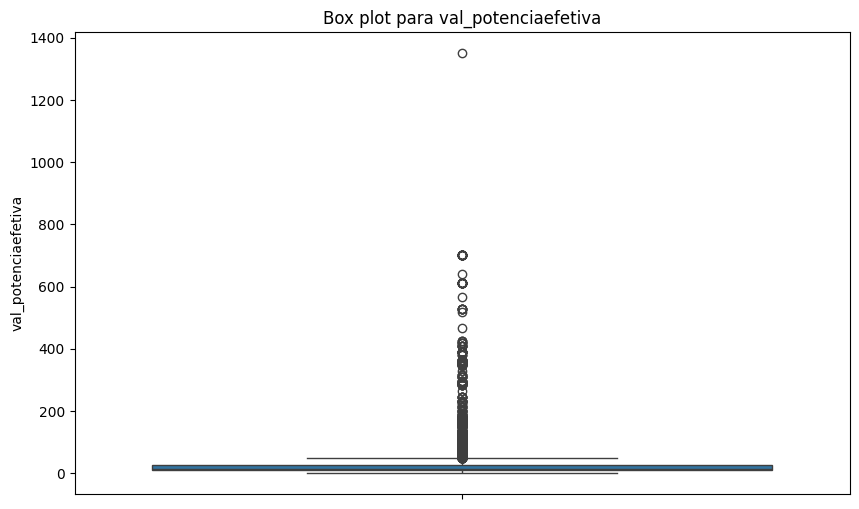

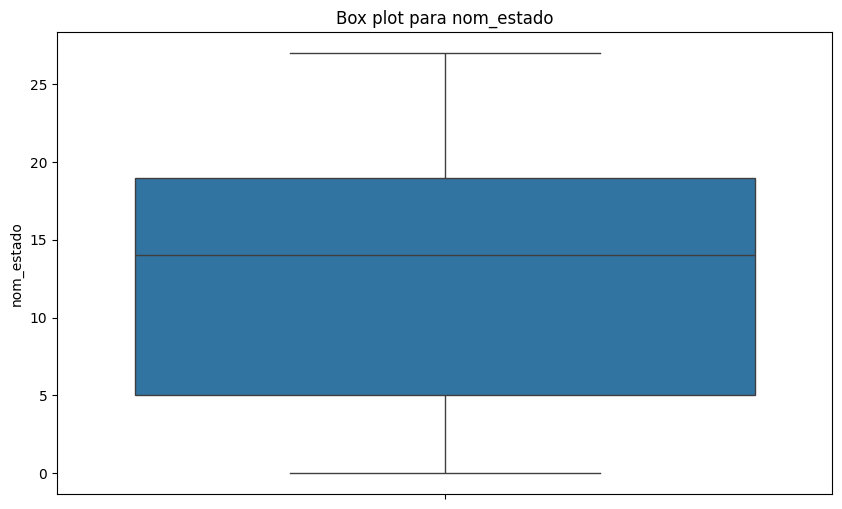

In [2]:

# Box plot para 'val_potenciaefetiva'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['val_potenciaefetiva'])
plt.title('Box plot para val_potenciaefetiva')
plt.show()

# Box plot para 'nom_estado'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['nom_estado'])
plt.title('Box plot para nom_estado')
plt.show()


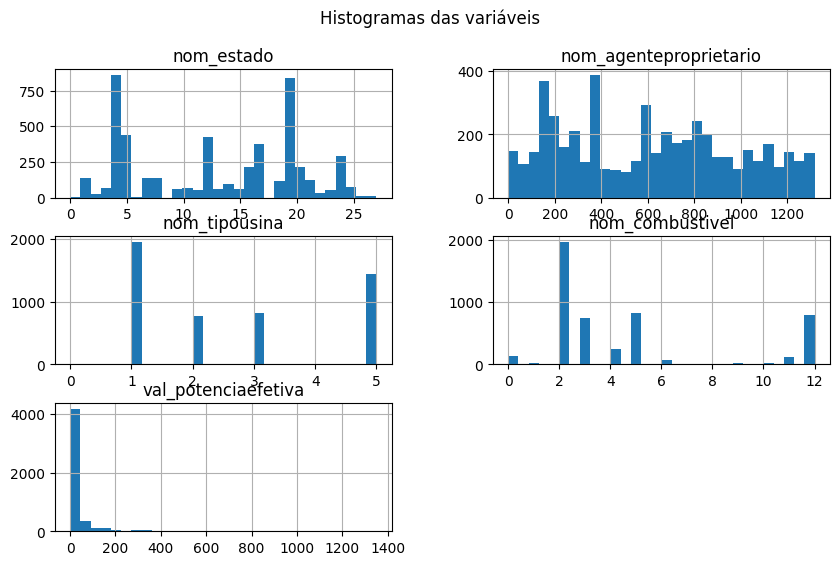

In [4]:

# Histograma
df.hist(figsize=(10, 6), bins=30)
plt.suptitle('Histogramas das variáveis')
plt.show()


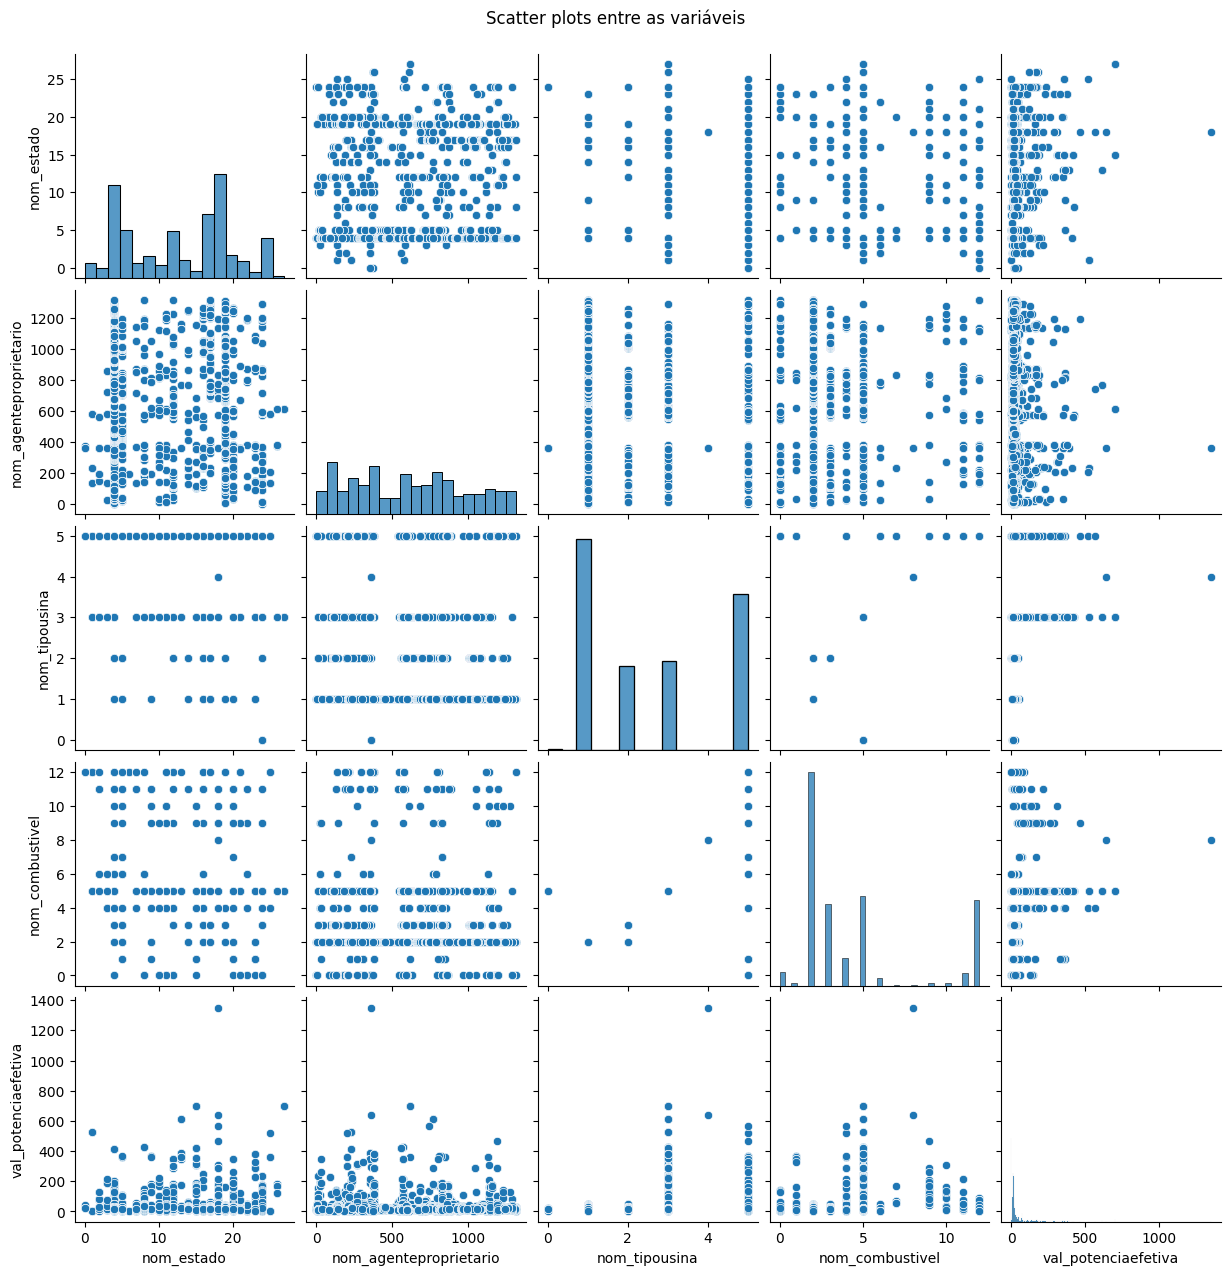

In [7]:

# Scatter plot
sns.pairplot(df)
plt.suptitle('Scatter plots entre as variáveis', y=1.02)
plt.show()


In [5]:

# Mapa de calor para correlação
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor para correlação')
plt.show()


ValueError: could not convert string to float: 'NE'

<Figure size 1200x800 with 0 Axes>

## Normalização

In [6]:

# Selecionar duas colunas para normalizar
cols_to_normalize = ['val_potenciaefetiva', 'nom_estado']  # Exemplo: 'val_potenciaefetiva' e 'nom_estado'
scaler = StandardScaler()
df_normalized = df.copy()
df_normalized[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Exibir o dataframe normalizado
df_normalized.head()


,id_subsistema,nom_subsistema,id_estado,nom_estado,nom_modalidadeoperacao,nom_agenteproprietario,nom_tipousina,nom_usina,ceg,nom_unidadegeradora,cod_equipamento,num_unidadegeradora,nom_combustivel,dat_entradateste,dat_entradaoperacao,dat_desativacao,val_potenciaefetiva
0,NE,NORDESTE,AL,-1.66101,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 1 AL,ALUXG-0UG1,1,5,1997-08-22,1997-08-22,NaN,5.79152
1,NE,NORDESTE,AL,-1.66101,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 2 AL,ALUXG-0UG2,2,5,1996-12-20,1996-12-20,NaN,5.79152
2,NE,NORDESTE,AL,-1.66101,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 3 AL,ALUXG-0UG3,3,5,1996-07-31,1996-07-31,NaN,5.79152
3,NE,NORDESTE,AL,-1.66101,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 4 AL,ALUXG-0UG4,4,5,1995-10-26,1995-10-26,NaN,5.79152
4,NE,NORDESTE,AL,-1.66101,TIPO I,229,3,XINGÓ,UHE.PH.SE.027053-9.01,UG 527 MW USINA XINGO 5 AL,ALUXG-0UG5,5,5,1995-01-31,1995-01-31,NaN,5.79152


## Distribuições Amostrais

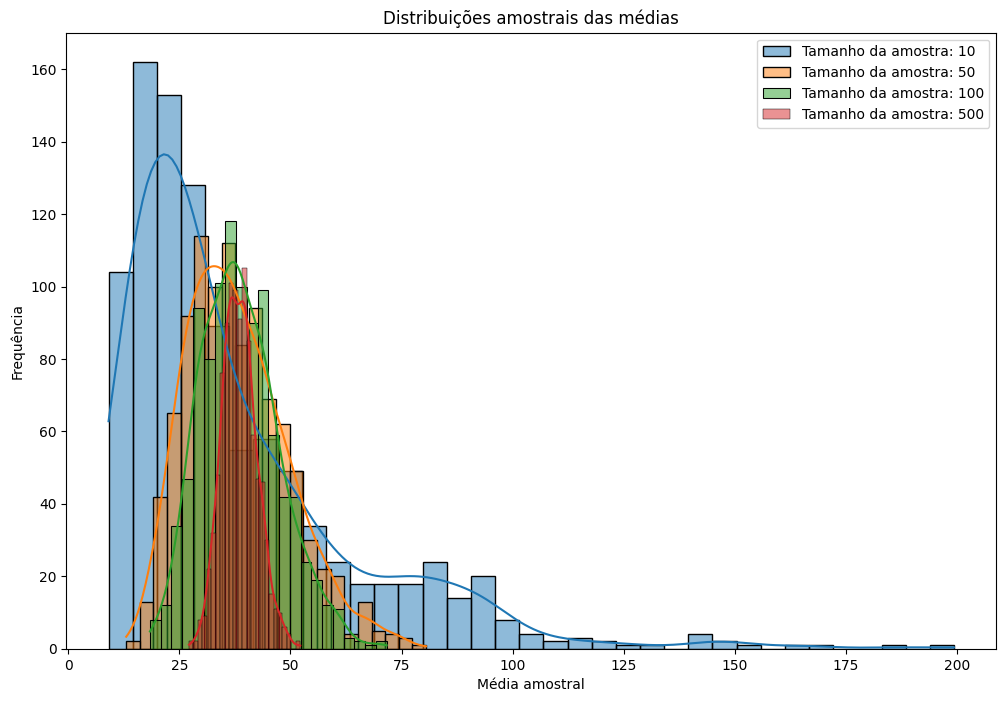

In [7]:

# Coluna 'val_potenciaefetiva'
column = 'val_potenciaefetiva'
sample_sizes = [10, 50, 100, 500]
sample_means = {size: [] for size in sample_sizes}

for size in sample_sizes:
    for _ in range(1000):
        sample = df[column].sample(size, replace=True)
        sample_means[size].append(sample.mean())

# Evolução das distribuiçõees amostrais das médias
plt.figure(figsize=(12, 8))
for size in sample_sizes:
    sns.histplot(sample_means[size], kde=True, label=f'Tamanho da amostra: {size}')
plt.title('Distribuições amostrais das médias')
plt.xlabel('Média amostral')
plt.ylabel('Frequência')
plt.legend()
plt.show()


## Intervalo de Confiança

In [11]:

# Coluna 'val_potenciaefetiva'
data = df['val_potenciaefetiva']
mean = np.mean(data)
sem = stats.sem(data)
confidence_intervals = {
    90: stats.t.interval(0.90, len(data)-1, loc=mean, scale=sem),
    95: stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)
}

# Exibir os Intervalos de Confiança
confidence_intervals


{90: (36.38121476674265, 40.31675354082817),
 95: (36.00410846508022, 40.693859842490596)}